Natural Language Processing Project

###### Project Objective
* Predicting the stars of yelp reviews by their words.
* Utilizing a Naive Bayes classifier for multinomial models
* And comparing a manual process to a Pipline process.

In [1]:
import numpy as np
import pandas as pd
import pickle
import zipfile # to read zip files
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

#Specialized data science Evaluation and Modeling libraries
from numpy import array
import scipy.stats as scs
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression,LinearRegression, SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
import spacy

#Visual Packages and dependancies 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Required NLP libraries and Dependancies
import re
import string
import nltk
import nlp
import random 
from nltk import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.corpus import wordnet, stopwords
import spacy
import os, json, gzip 
from textblob import TextBlob, Word, Blobber

#Neural Network libraries and dependancies
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

from keras import regularizers, optimizers
from keras.layers import Embedding, Dense, Dropout, Input, LSTM, GlobalMaxPool1D
from keras.models import Sequential
from keras.initializers import Constant
import tensorflow as tf
import spacy

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import plotly.graph_objects as go
sns.set_context("poster")
sns.set(rc={'figure.figsize': (16, 9.)})
sns.set_style("darkgrid")
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

import chart_studio.plotly as py ### colorscale='ylorbr'
%matplotlib inline
import plotly.graph_objs as go
from plotly import __version__
print(__version__)
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

cf.go_offline()

5.5.0


In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


Create a new 'text length' column

In [6]:
yelp['text length'] = yelp['text'].apply(len)

Next Exploritory Data Analysis

In [47]:
fig = px.scatter(yelp,

    x='text length',

    y='stars',

    facet_row='stars')
fig.show()

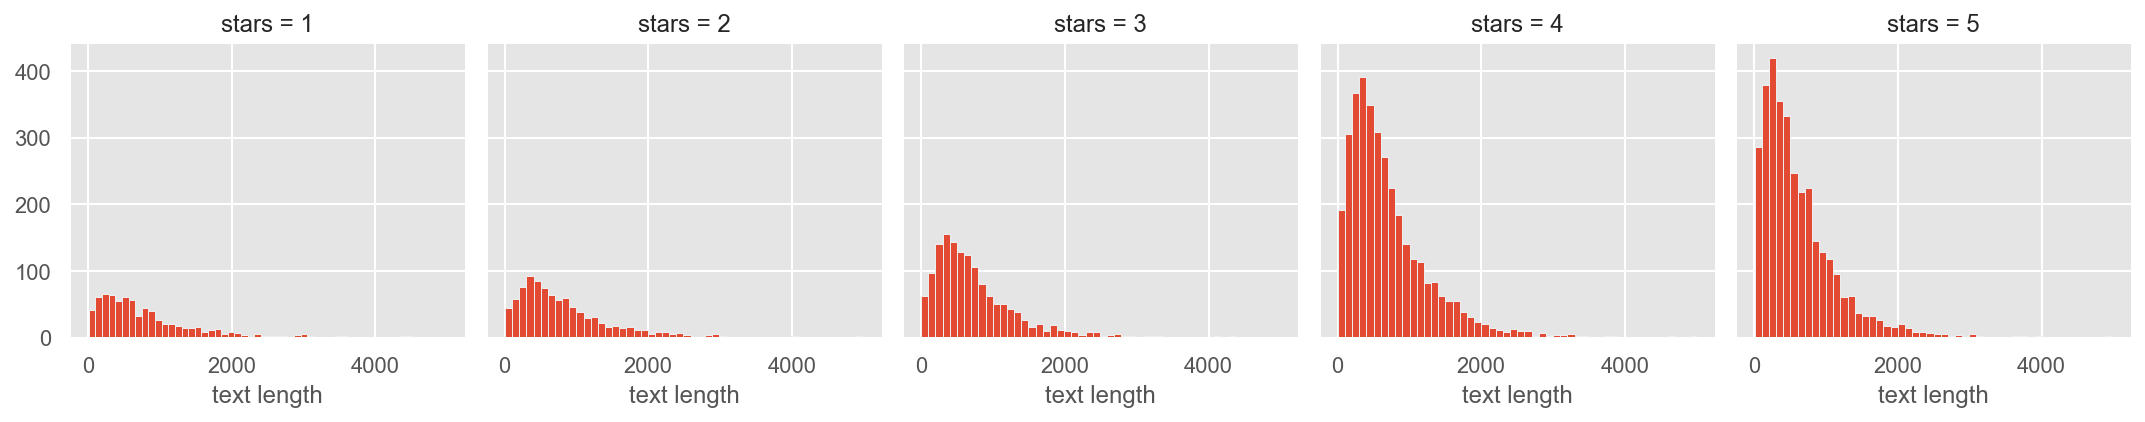

In [42]:
g = sns.FacetGrid(yelp,col='stars',)
g.map(plt.hist,'text length',bins=50)

In [10]:
import plotly.express as px

fig = px.box(yelp, x="stars", y="text length", points="all")
fig.show()

<AxesSubplot:xlabel='stars', ylabel='count'>

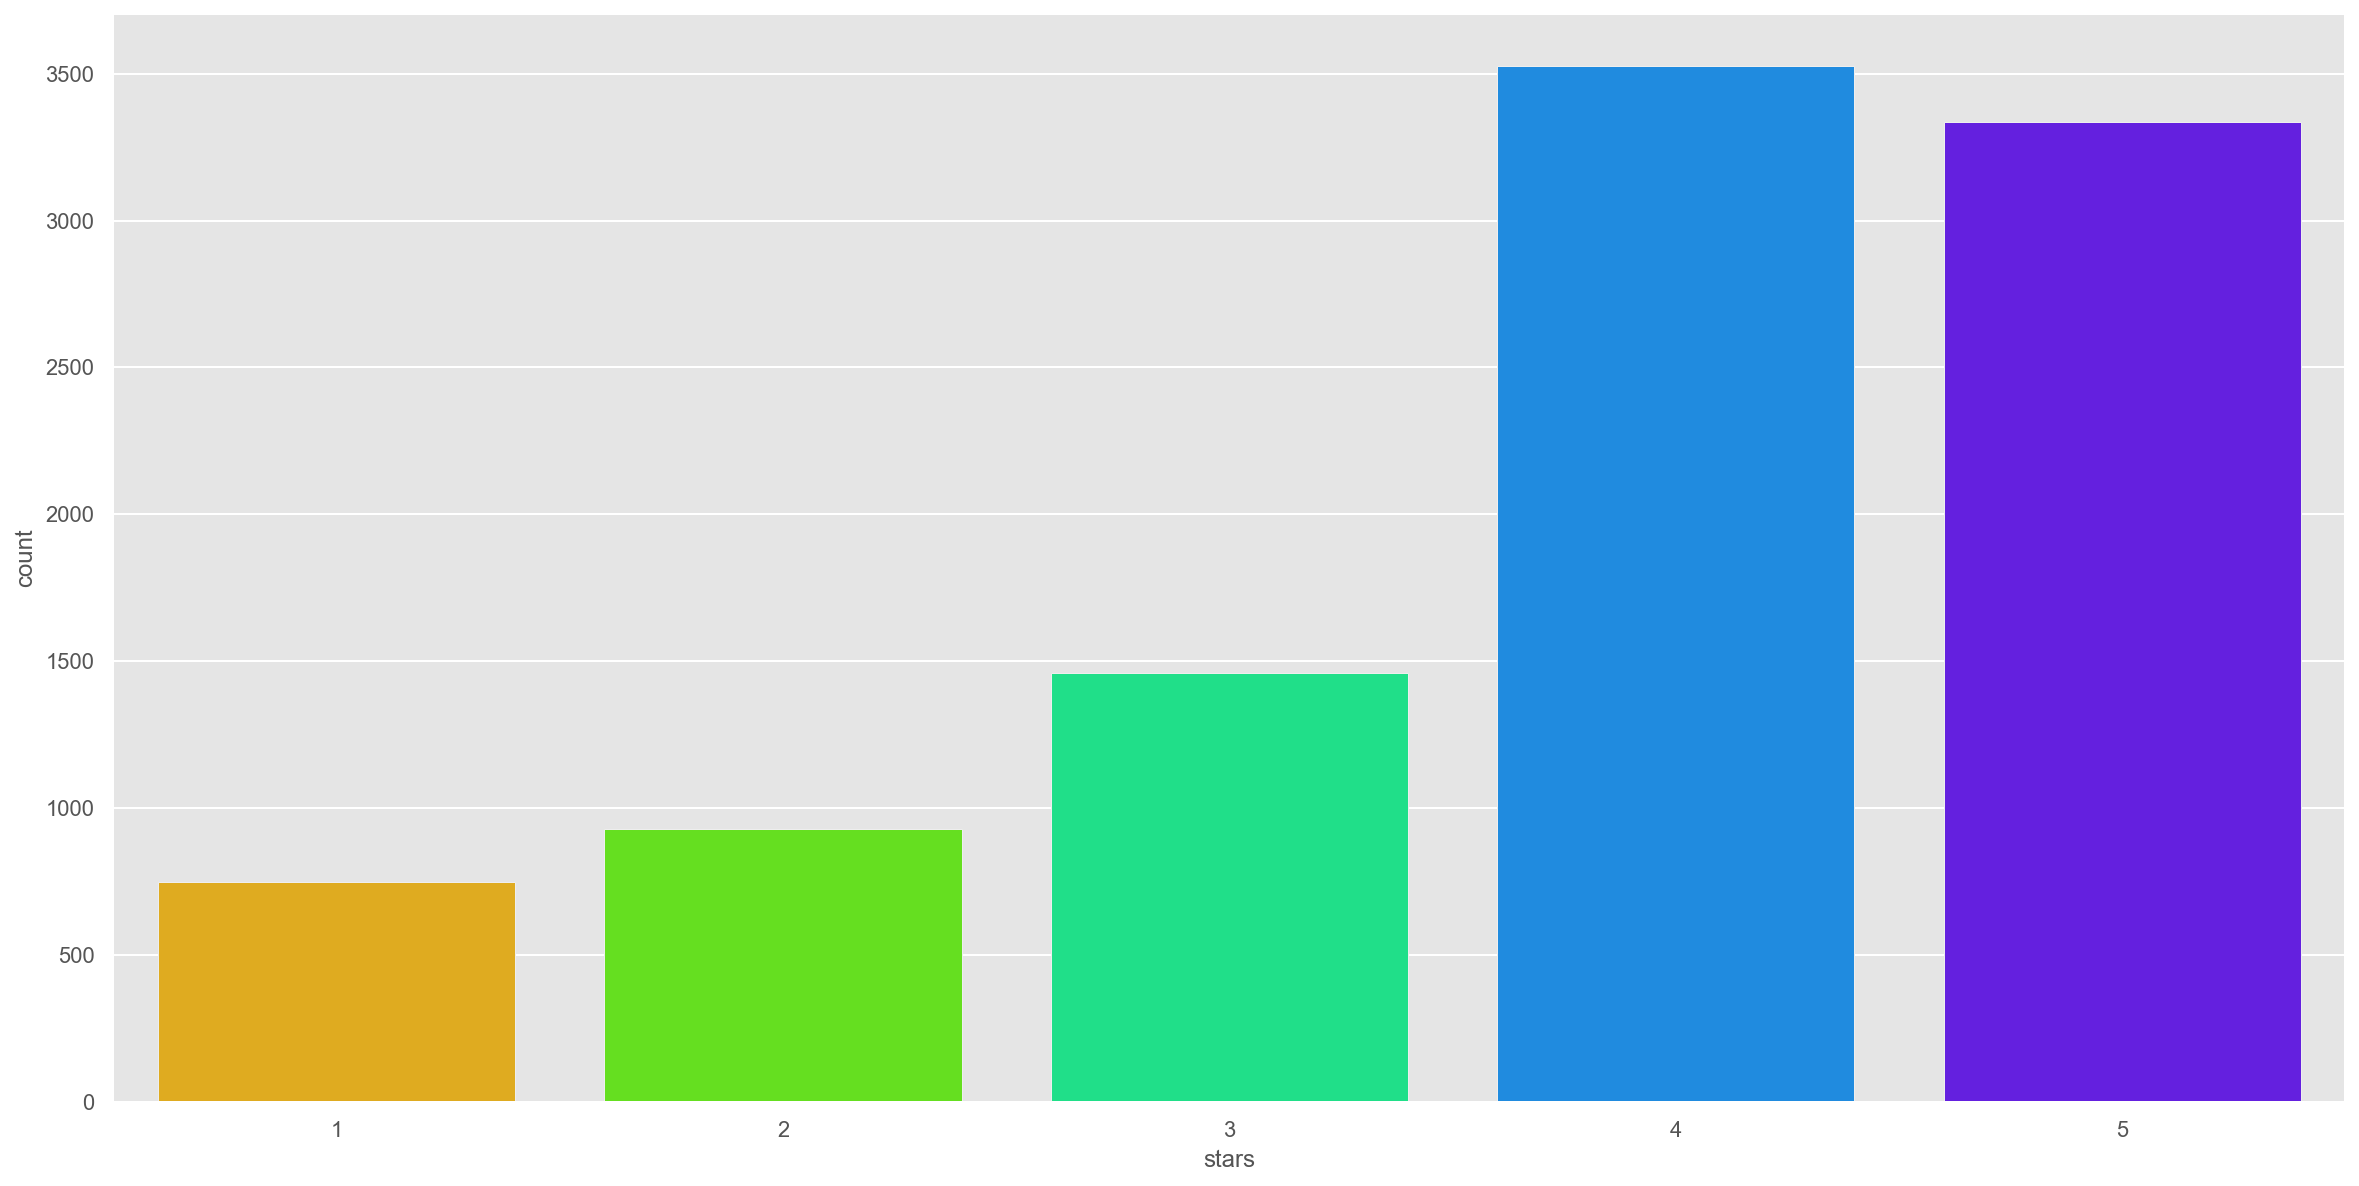

In [49]:
plt.figure(figsize=(20,10))
sns.countplot(x='stars',data=yelp,palette='gist_rainbow')

In [14]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [15]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


<AxesSubplot:>

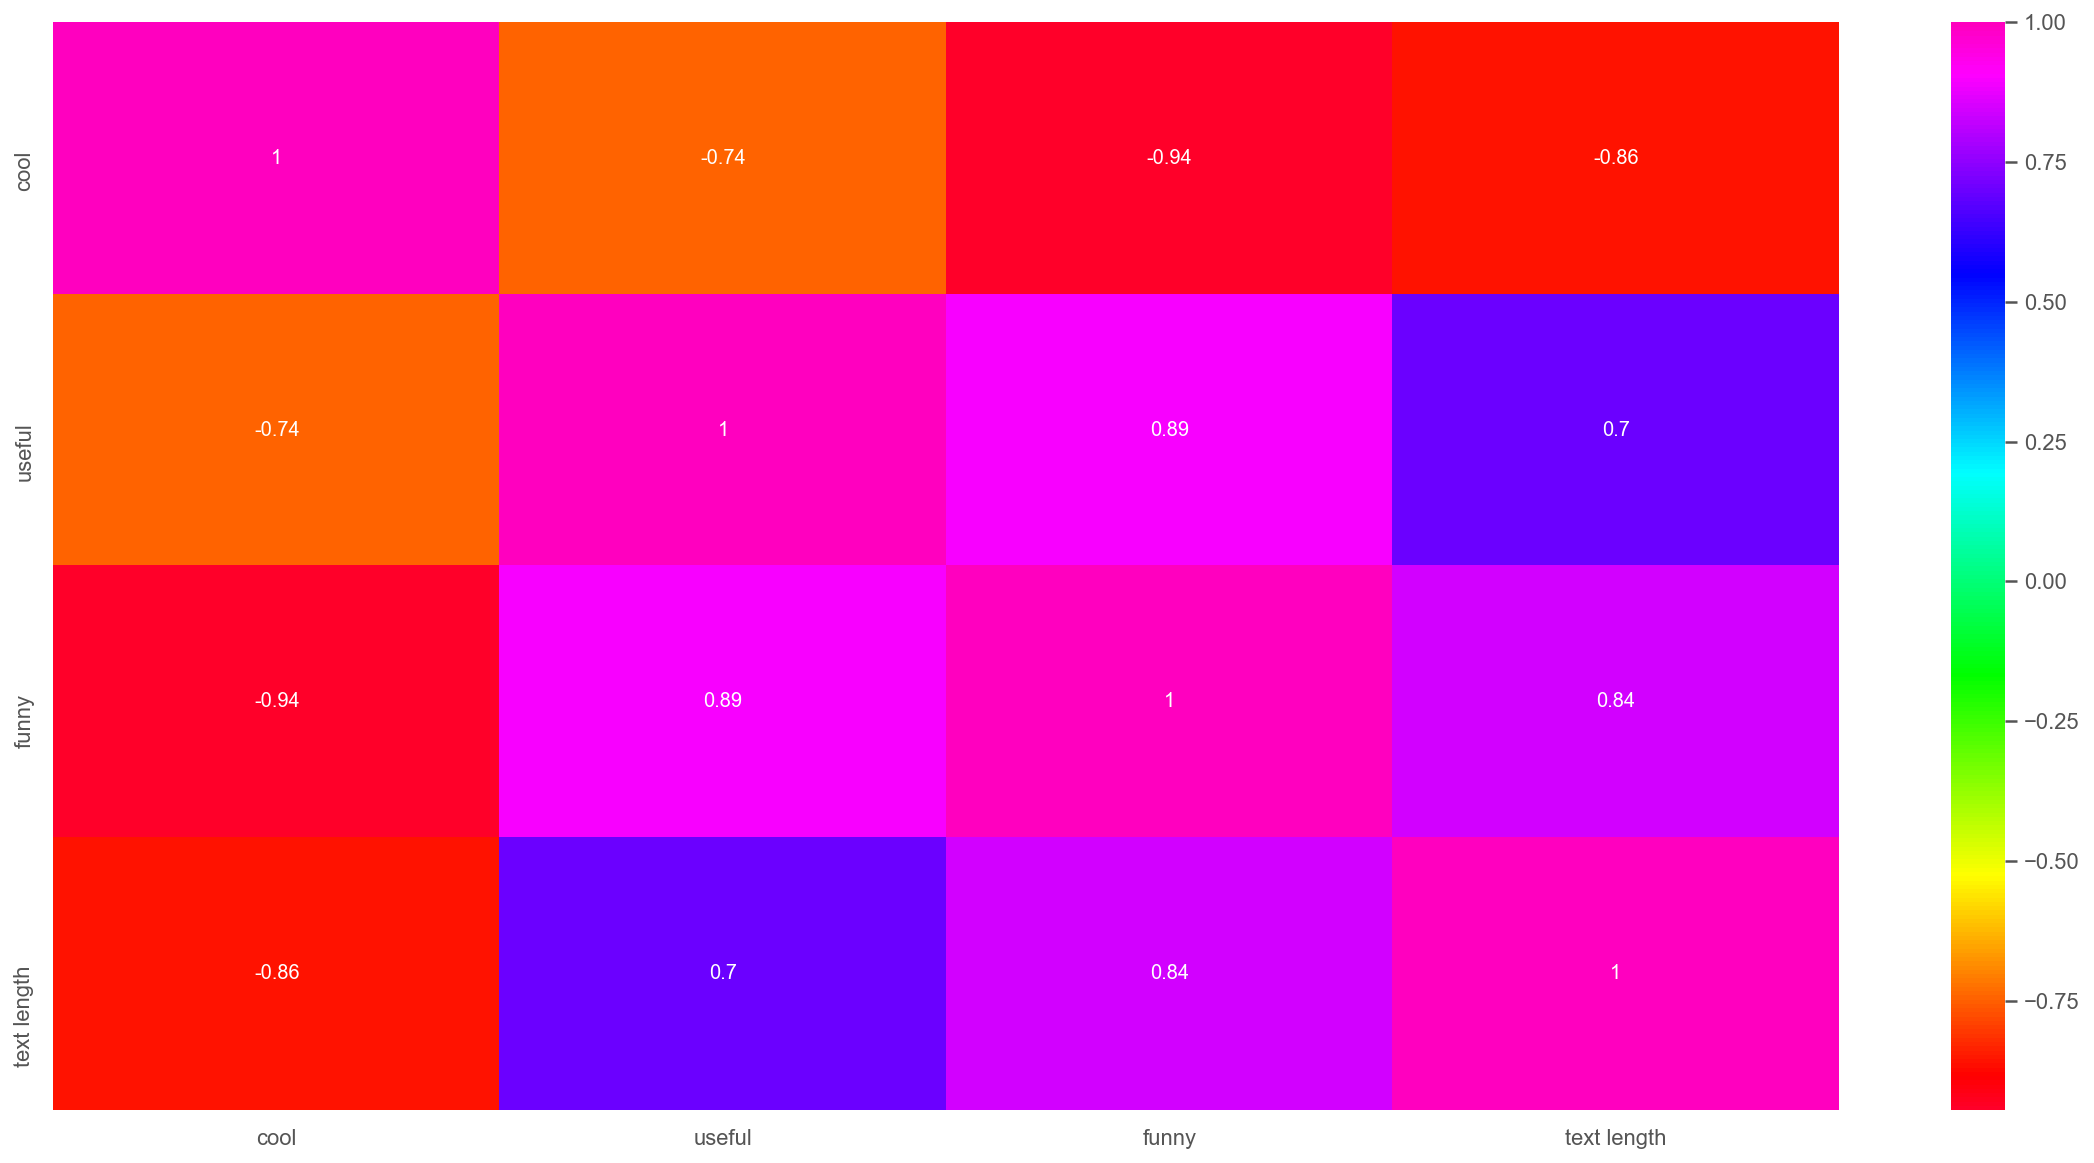

In [48]:
plt.figure(figsize=(20,10))
sns.heatmap(stars.corr(),cmap='gist_rainbow',annot=True)

NLP Classification

In [19]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [20]:
X = yelp_class['text']
y = yelp_class['stars']

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [22]:
X = cv.fit_transform(X)

Trian Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=57)

Train Model
*  Import MultinomialNB and create an instance 'nb'

In [24]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [25]:
nb.fit(X_train,y_train)

MultinomialNB()

Prediction and Evaluation

In [26]:
predictions = nb.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix,classification_report

In [28]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[155  73]
 [ 35 963]]


              precision    recall  f1-score   support

           1       0.82      0.68      0.74       228
           5       0.93      0.96      0.95       998

    accuracy                           0.91      1226
   macro avg       0.87      0.82      0.84      1226
weighted avg       0.91      0.91      0.91      1226



Next try the same analysis with a Pipeline process 

In [32]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [29]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=57)

In [33]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

Predict and Evaluate (again)

In [34]:
predictions = pipeline.predict(X_test)

In [35]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



Results

###### The Pipeline method while easier to perform had considerably weaker results.  
* Decreasing the weighted average from 91% to 66%.
* Demonstrating that easier is not always better!